# Exploratory Data Analysis

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys
import glob
import re

## Access Files

First step is to navigate to the `Rosenthal` folder under `gallina` and load all the files into an iglob iterator.

### Rosenthal Folder

In [2]:
print("Current directory:",os.getcwd())

Current directory: /mnt/rds/redhen/gallina/home/hxm471/RedHenLab-Multimodal_TV_Show_Segmentation/mtvss/notebooks


In [3]:
# Check if the Rosenthal directory exists
ros_path = "/mnt/rds/redhen/gallina/Rosenthal/"
print("Directory exists:",os.path.isdir(ros_path))

# Check that the Rosenthal directory is not empty
ros_items = os.listdir(ros_path)
if len(ros_items)==0:
    print("Error! Directory is empty")
else:
    # If not empty print the subdirectories
    print("Items in directory:",ros_items)

Directory exists: True
Items in directory: ['1972', '1978', '1985', '1961', '1982', '1988', '2006', '1975', '1991', '1971', '1962', '1986', '1981', '2005', '1992', '1976', '1990', '1974', '1989', '1983', '1960', '1984', '1979', '1973', '2004', '1977', '1980', '1987', '1969', '1963']


In [4]:
# Starting index of the file name (used to remove path info)
FILE_START_INDEX = 58

In [5]:
# Method to traverse through all of the iglob files recursively
def traverse_iglob(files):
    # Establish a counter variable to keep track of no of files.
    ctr=0
    # Maintain a list to extract only the file names
    files_split=[]
    
    # Loop through the iglob iterator and update the variables
    for file in files:
        print(file)
        ctr+=1
        file_split = file[FILE_START_INDEX:].split('_')
        year, month, day = file_split[0].split('-')
        files_split.append([file_split[0]]+[year]+[month]+[day]+file_split[1:5]+[file_split[-1]]+[file])
    return ctr,files_split

In [6]:
# Crete iglob iterator for all mp4 files
mp4_files = glob.iglob(ros_path+"**/*.mp4", recursive=True)

# Use method to extract file count and name
mp4_ctr, mp4_files_split = traverse_iglob(mp4_files)

/mnt/rds/redhen/gallina/Rosenthal/1972/1972-07/1972-07-01/1972-07-01_0000_US_00010144_V0_U1_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-10/1972-10-06/1972-10-06_0000_US_00016471_V0_VHS16_MB13_H15_JS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-10/1972-10-06/1972-10-06_0000_US_00015980_V1_VHS5_MB30_H7_JS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-09/1972-09-14/1972-09-14_0000_US_00025933_B0_B11_MB36_E5_KC.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-09/1972-09-01/1972-09-01_0000_US_00016359_V0_VHSP21_M8_H6_WR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-20/1972-06-20_0000_US_00019725_B1_B46_M2_E7_WR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-20/1972-06-20_0000_US_00019724_B3_B1_MB40_E8_WR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-19/1972-06-19_0000_US_00019723_B1_B47_M4_E10_WR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-01/1972-01-19/1972-01-19_0000_US_00010324_B0_B7_M2_E7_DJ_BE.mp4
/mnt/rds/redhen/gallina/Rosen

/mnt/rds/redhen/gallina/Rosenthal/1985/1985-06/1985-06-05/1985-06-05_0000_US_00023889_B0_B48_MB32_E11_DG_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-06/1985-06-20/1985-06-20_0000_US_00021558_B0_B12_M6_E6_DX.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-06/1985-06-20/1985-06-20_0000_US_00022055_B0_B12_M6_E6_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-06/1985-06-15/1985-06-15_0000_US_00023873_B0_B53_MB52_H19_AZ.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-06/1985-06-06/1985-06-06_0000_US_00023894_B0_B47_M4_E10_DG_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-06/1985-06-06/1985-06-06_0000_US_00023886_B0_B54_MB40_E8_AD_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-12/1985-12-11/1985-12-11_0000_US_00041634_B0_B58_MB32_E11_PL_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-12/1985-12-29/1985-12-29_0000_US_00041176_B0_B49_MB42_E5_HL.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-12/1985-12-04/1985-12-04_0000_US_00043032_B0_B46_M2_E7_CK_BE.mp4
/mnt/rds/redhen/g

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-06/1988-10-06_0000_US_NA019320_B14_B10_M43_E6_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-06/1988-10-06_0000_US_NA019318_B12_B82_M29_H41_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-06/1988-10-06_0000_US_NA019316_B10_B73_M39_E2_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-06/1988-10-06_0000_US_00041754_B0_B12_M6_E6_JA_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-06/1988-10-06_0000_US_NA019295_B5_B73_M39_E2_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-06/1988-10-06_0000_US_NA019306_B14_B63_M19_H30_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-06/1988-10-06_0000_US_NA019292_B2_B12_M21_H40_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-06/1988-10-06_0000_US_NA019304_B14_B63_M19_H30_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-06/1988-10-06_0000_US_NA019294_B4_B69_M32_E17_MM.mp4
/mnt/rds/redhen/gallina/R

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-26/2006-06-26_0000_US_00003978_V3_VHS38_MB4_H31_DX.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-26/2006-06-26_0000_US_Archive_V3_MB2_VHS2_H8_MS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-26/2006-06-26_0000_US_00000625_V13_VHS25_MB53_H38_KQ.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-26/2006-06-26_0000_US_00004021_V2_MB5_VHS5_H7_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-26/2006-06-26_0000_US_00002825_V10_MB9_VHSP1_H5_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-26/2006-06-26_0000_US_00003964_V3_VHS24_MB38_H25_KQ_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-26/2006-06-26_0000_US_00000097_V11_MB10_VHS6_H12_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-26/2006-06-26_0000_US_00000625_V13_VHS24_MB38_H25_DX.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-26/2006-06-26_0000_US_00002825_V10_VHS47_MB8_H34_JA.mp4
/mnt/

/mnt/rds/redhen/gallina/Rosenthal/1991/1991-11/1991-11-11/1991-11-11_0000_US_NA033455_V14_VHSP15_MB13_E12_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-11/1991-11-11/1991-11-11_0000_US_00020725_B_B6_M6_E6_JS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-11/1991-11-11/1991-11-11_0000_US_NA033423_V2_VHSP20_MB10_H33_JO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-11/1991-11-11/1991-11-11_0000_US_NA033453_V12_VHS35_MB5_H9_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-11/1991-11-11/1991-11-11_0000_US_NA033452_V11_VHS40_MB16_H35_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-11/1991-11-11/1991-11-11_0000_US_NA033447_V1_VHSP21_MB57_H49_BA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-11/1991-11-11/1991-11-11_0000_US_00041276_V0_VHS39_MB9_H32_GS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-11/1991-11-11/1991-11-11_0000_US_NA033450_V9_VHS64_MB27_H32_BA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-11/1991-11-11/1991-11-11_0000_US_NA033441_V20_VHS12_MB1_H29_BA.mp4
/mnt/

/mnt/rds/redhen/gallina/Rosenthal/1991/1991-07/1991-07-06/1991-07-06_0000_US_NA032211_V7_VHS47_MB56_E11_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-07/1991-07-06/1991-07-06_0000_US_NA032210_V6_VHS35_MB5_H9_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-07/1991-07-06/1991-07-06_0000_US_NA032212_V8_VHSP16_MB11_H2_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-07/1991-07-06/1991-07-06_0000_US_00043903_V0_VHS57_MB2_H35_HC_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-07/1991-07-06/1991-07-06_0000_US_NA032209_V5_VHS40_MB16_H35_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-07/1991-07-01/1991-07-01_0000_US_00020539_B0_B1_MB40_E8_MP.mp4
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-07/1991-07-01/1991-07-01_0000_US_NA032171_V9_VHS23_MB12_H28_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-07/1991-07-01/1991-07-01_0000_US_NA032175_V13_VHS61_MB6_H43_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-07/1991-07-01/1991-07-01_0000_US_NA032163_V17_VHS18_MB28_E10_TM.mp4
/mnt

/mnt/rds/redhen/gallina/Rosenthal/2005/2005-04/2005-04-06/2005-04-06_0000_US_00006310_V1_VHSP6_MB15_E2_JC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-04/2005-04-06/2005-04-06_0000_US_00006313_V15_VHS15_M6_H9_ES.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-04/2005-04-06/2005-04-06_0000_US_00005968_V11_VHS18_MB2_H2_KP.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-04/2005-04-06/2005-04-06_0000_US_00006180_V4_VHS12_MB11_H6_CC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-04/2005-04-06/2005-04-06_0000_US_00006311_V3_VHS3_MB3_E3_LZ.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-04/2005-04-06/2005-04-06_0000_US_00006312_V12_VHS12_MB11_H6_KP.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-04/2005-04-06/2005-04-06_0000_US_00006229_V2_VHS12_MB11_H6_KP.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-04/2005-04-06/2005-04-06_0000_US_00006169_V5_VHSP6_MB15_E2_KP.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-04/2005-04-06/2005-04-06_0000_US_00006193_V10_VHS12_MB11_H6_MS.mp4
/mnt/rds/re

/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-01/2005-09-01_0000_US_00002230_V11_VHS8_MB10_H10_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-01/2005-09-01_0000_US_00000655_V1_MB11_VHS12_H6_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-01/2005-09-01_0000_US_00002364_V15_VHS14_MB13_H1_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-01/2005-09-01_0000_US_00002577_V5_VHSP4_MB9_H14_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-01/2005-09-01_0000_US_00000530_V2_MB7_VHS7_H11_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-01/2005-09-01_0000_US_00001305_V3_VHS3_MB3_E3_SA.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-01/2005-09-01_0000_US_00002576_V4_VHS12_MB11_H6_RL.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-01/2005-09-01_0000_US_00000530_V2_VHS13_M1_H3_SA.mp4
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-09/2005-09-01/2005-09-01_0000_US_00001776_V12_VHS4_MB1_E1_KE_BE.mp4
/mnt/rds/re

/mnt/rds/redhen/gallina/Rosenthal/1992/1992-03/1992-03-17/1992-03-17_0000_US_NA034755_V3_VHS23_MB12_H28_LK.mp4
/mnt/rds/redhen/gallina/Rosenthal/1992/1992-03/1992-03-17/1992-03-17_0000_US_NA034788_V22_VHSP16_MB11_H2_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1992/1992-03/1992-03-17/1992-03-17_0000_US_NA034753_V1_VHS52_MB4_H31_LK.mp4
/mnt/rds/redhen/gallina/Rosenthal/1992/1992-03/1992-03-17/1992-03-17_0000_US_NA034739_V23_VHS23_MB12_H28_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1992/1992-03/1992-03-17/1992-03-17_0000_US_NA034790_V4_VHS60_MB28_E10_LK.mp4
/mnt/rds/redhen/gallina/Rosenthal/1992/1992-03/1992-03-17/1992-03-17_0000_US_NA034742_V5_VHSP16_MB11_H2_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1992/1992-03/1992-03-17/1992-03-17_0000_US_NA034761_V13_VHS47_MB56_E11_LK.mp4
/mnt/rds/redhen/gallina/Rosenthal/1992/1992-03/1992-03-17/1992-03-17_0000_US_NA034791_V22_VHSP25_MB22_H26_LK.mp4
/mnt/rds/redhen/gallina/Rosenthal/1992/1992-03/1992-03-17/1992-03-17_0000_US_NA034757_V9_VHSP18_MB2_H24_LK.m

/mnt/rds/redhen/gallina/Rosenthal/1976/1976-11/1976-11-29/1976-11-29_0000_US_00010046_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-11/1976-11-30/1976-11-30_0000_US_00010162_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-11/1976-11-02/1976-11-02_0000_US_00010138_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-11/1976-11-02/1976-11-02_0000_US_00010142_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-11/1976-11-02/1976-11-02_0000_US_00010141_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-11/1976-11-20/1976-11-20_0000_US_00020067_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-11/1976-11-01/1976-11-01_0000_US_00010068_V0_U1_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-11/1976-11-01/1976-11-01_0000_US_00010137_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-11/1976-11-03/1976-11-03_0000_US_00010139_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-11

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-03/1989-03-03_0000_US_NA022083_B10_B47_M35_E8_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-03/1989-03-03_0000_US_NA022081_B8_B73_M39_E2_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-03/1989-03-03_0000_US_NA021938_B14_B76_M30_E15_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-03/1989-03-03_0000_US_NA022079_B4_B55_M38_H48_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-03/1989-03-03_0000_US_NA021998_B13_BP3_M46_E20_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-03/1989-03-03_0000_US_NA022082_B9_B75_M42_H38_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-03/1989-03-03_0000_US_NA021937_B13_B81_M29_H41_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-03/1989-03-03_0000_US_NA021992_B4_B75_M42_H38_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-03/1989-03-03_0000_US_NA022084_B11_B67_M7_H28_JM.mp4
/mnt/rds/redhen/gallina/Ro

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-02/1989-04-02_0000_US_NA022567_V10_VHS35_M34_H26_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-02/1989-04-02_0000_US_NA022576_V5_VHS41_MB30_H29_LB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-02/1989-04-02_0000_US_NA022570_V13_VHS51_MB22_H9_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-02/1989-04-02_0000_US_NA022568_V11_VHSP16_M32_H23_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-02/1989-04-02_0000_US_NA022563_V5_VHS48_MB11_E17_JA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-02/1989-04-02_0000_US_NA022584_V14_VHSP18_M23_H18_KZ.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-02/1989-04-02_0000_US_NA022582_V12_VHS46_M15_H41_ON.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-02/1989-04-02_0000_US_NA022565_V8_VHS15_M22_H1_JA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-04/1989-04-02/1989-04-02_0000_US_NA022566_V9_VHS5_MB9_H30_CM.mp4
/mn

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-13/1989-11-13_0000_US_NA026241_B4_B66_M38_H48_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-13/1989-11-13_0000_US_NA026265_V10_VHS35_MB5_H9_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-13/1989-11-13_0000_US_NA026261_V5_VHS38_MB23_H20_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-13/1989-11-13_0000_US_NA026282_V12_VHS38_MB23_H20_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-13/1989-11-13_0000_US_NA026278_V8_VHS50_MB24_H5_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-13/1989-11-13_0000_US_NA026279_V9_VHSP21_MB56_H49_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-13/1989-11-13_0000_US_NA026262_V6_VHS24_MB2_H24_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-13/1989-11-13_0000_US_NA026281_V11_VHS53_MB26_H17_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-13/1989-11-13_0000_US_NA026263_V8_VHS42_M25_H37_LA.mp4
/mnt/

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-23/1989-11-23_0000_US_NA026442_V6_VHS60_MB6_H43_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-23/1989-11-23_0000_US_NA026445_V10_VHSP25_MB22_H26_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-23/1989-11-23_0000_US_NA026424_V4_VHS48_MB9_H23_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-23/1989-11-23_0000_US_NA026421_V1_VHS18_MB28_E10_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-23/1989-11-23_0000_US_NA026447_V12_VHS48_MB9_H23_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-23/1989-11-23_0000_US_NA026422_V2_VHS51_MB8_H16_RH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-23/1989-11-23_0000_US_NA026436_V17_VHS42_M25_H37_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-23/1989-11-23_0000_US_NA026444_V9_VHS51_MB8_H16_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-23/1989-11-23_0000_US_NA026443_V8_VHS18_MB28_E10_LA.mp4
/mn

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-20/1989-11-20_0000_US_NA026399_V13_VHSP16_MB11_H2_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-20/1989-11-20_0000_US_NA026393_V6_VHS42_M25_H37_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-20/1989-11-20_0000_US_NA026395_V9_VHS35_MB5_H9_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-20/1989-11-20_0000_US_NA026402_V16_VHS51_MB8_H16_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-20/1989-11-20_0000_US_NA026394_V8_VHS40_MB16_H35_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-20/1989-11-20_0000_US_NA026383_V12_VHS41_MB30_H34_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-20/1989-11-20_0000_US_NA026377_V3_VHS60_MB6_H43_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-20/1989-11-20_0000_US_NA026378_V4_VHS51_MB8_H16_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-11/1989-11-20/1989-11-20_0000_US_NA026392_V5_VHS24_MB2_H24_JM.mp4
/mnt/

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-30/1989-06-30_0000_US_NA023968_V5_VHS35_MB5_H9_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-30/1989-06-30_0000_US_NA023969_V6_VHS47_MB57_E11_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-30/1989-06-30_0000_US_NA023952_V4_VHS12_MB1_H29_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-30/1989-06-30_0000_US_NA023948_B13_B47_M35_E8_AR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-30/1989-06-30_0000_US_NA023949_B14_B37_M37_H47_AR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-30/1989-06-30_0000_US_NA023970_V8_VHSP15_MB13_E12_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-30/1989-06-30_0000_US_NA023977_V15_VHSP25_MB22_H26_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-30/1989-06-30_0000_US_NA023951_V3_VHS18_MB28_E10_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-30/1989-06-30_0000_US_NA023950_V2_VHS24_MB2_H24_CM.mp4
/mnt/rd

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-20/1989-06-20_0000_US_NA023817_V13_VHSP20_MB10_H33_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-20/1989-06-20_0000_US_NA023781_V1_VHS38_MB23_H20_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-20/1989-06-20_0000_US_NA023782_V2_VHS16_M25_H37_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-20/1989-06-20_0000_US_NA023813_V9_VHS12_MB1_H29_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-20/1989-06-20_0000_US_NA023793_B12_B33_M40_H14_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-20/1989-06-20_0000_US_NA023783_V3_VHS40_MB16_H35_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-20/1989-06-20_0000_US_NA023792_B9_B80_M20_E7_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-20/1989-06-20_0000_US_NA023811_V6_VHS24_MB2_H24_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-20/1989-06-20_0000_US_NA023784_V4_VHS35_MB5_H9_JM.mp4
/mnt/rds/r

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-17/1989-06-17_0000_US_NA023753_V3_VHS41_MB30_H34_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-17/1989-06-17_0000_US_NA023752_V2_VHS48_MB9_H23_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-17/1989-06-17_0000_US_NA023739_V3_VHS23_MB12_H28_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-17/1989-06-17_0000_US_NA023755_V5_VHS50_MB24_H5_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-17/1989-06-17_0000_US_NA023738_V2_VHS38_MB23_H20_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-17/1989-06-17_0000_US_NA023757_V8_VHSP21_MB56_H49_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-17/1989-06-17_0000_US_NA023754_V4_VHSP20_MB10_H33_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-17/1989-06-17_0000_US_NA023737_V1_VHS38_MB23_H20_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-17/1989-06-17_0000_US_NA023758_V9_VHS38_MB23_H20_JM.mp4
/

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-10/1989-06-10_0000_US_NA023623_V1_VHS48_MB9_H23_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-10/1989-06-10_0000_US_NA023641_V4_VHS16_M25_H37_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-10/1989-06-10_0000_US_NA023640_V3_VHS48_MB9_H23_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-10/1989-06-10_0000_US_NA023625_V3_VHS24_MB2_H24_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-10/1989-06-10_0000_US_NA023649_V13_VHS51_MB8_H16_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-10/1989-06-10_0000_US_NA023626_V4_VHSP20_MB57_E16_EN.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-10/1989-06-10_0000_US_NA023661_V16_VHS12_MB1_H29_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-10/1989-06-10_0000_US_NA023624_V2_VHS23_MB12_H28_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-06/1989-06-10/1989-06-10_0000_US_NA023634_V13_VHSP20_MB10_H33_AD.mp4
/m

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-06/1989-01-06_0000_US_NA021310_B9_B12_M21_H40_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-06/1989-01-06_0000_US_NA021309_B8_B75_M42_H38_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-06/1989-01-06_0000_US_NA021296_B5_B37_M37_H47_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-06/1989-01-06_0000_US_NA021307_B4_B58_M19_H30_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-06/1989-01-06_0000_US_NA021298_B7_B67_M7_H28_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-06/1989-01-06_0000_US_NA021297_B6_B78_M22_E22_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-06/1989-01-06_0000_US_NA021303_B12_B12_M21_H40_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-06/1989-01-06_0000_US_NA021294_B3_B73_M39_E2_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-06/1989-01-06_0000_US_NA021302_B11_B67_M7_H28_DG.mp4
/mnt/rds/redhen/gallina/Rosen

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-05/1989-01-05_0000_US_NA021285_B7_B55_M38_H48_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-05/1989-01-05_0000_US_NA021284_B6_B70_M25_H42_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-05/1989-01-05_0000_US_NA021289_B11_B33_M40_H14_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-05/1989-01-05_0000_US_NA021305_B14_B33_M40_H14_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-05/1989-01-05_0000_US_NA021304_B13_B76_M30_E15_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-05/1989-01-05_0000_US_NA021293_B14_B10_M43_E6_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-05/1989-01-05_0000_US_NA021300_B9_B69_M32_E3_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-05/1989-01-05_0000_US_NA021290_B12_B58_M19_H30_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-05/1989-01-05_0000_US_NA021299_B8_B55_M38_H48_MM.mp4
/mnt/rds/redhen/gallina/R

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-02/1989-01-02_0000_US_NA021265_B14_B73_M39_E2_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-02/1989-01-02_0000_US_NA021259_B6_B69_M32_E3_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-02/1989-01-02_0000_US_NA021257_B4_B58_M19_H30_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-02/1989-01-02_0000_US_NA021258_B5_B67_M7_H28_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-02/1989-01-02_0000_US_NA021256_B3_B10_M43_E6_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-02/1989-01-02_0000_US_NA021260_B7_B37_M37_H47_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-02/1989-01-02_0000_US_00041050_B0_B49_MB42_E5_AZ_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-21/1989-01-21_0000_US_NA021495_B3_B62_MB26_E11_JA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-21/1989-01-21_0000_US_NA021503_B11_B46_MB33_H14_JO.mp4
/mnt/rds/redhen/gallina/R

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-09/1989-01-09_0000_US_NA021332_B9_B81_M29_H41_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-09/1989-01-09_0000_US_NA021329_B5_B37_M37_H47_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-09/1989-01-09_0000_US_NA021350_B14_B76_M30_E15_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-09/1989-01-09_0000_US_NA021330_B6_B58_M19_H30_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-09/1989-01-09_0000_US_NA021340_B4_B73_M39_E2_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-09/1989-01-09_0000_US_NA021344_B8_B12_M21_H40_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-09/1989-01-09_0000_US_NA021331_B7_B76_M30_E15_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-09/1989-01-09_0000_US_NA021338_B14_B12_M21_H40_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-01/1989-01-09/1989-01-09_0000_US_NA021349_B13_B10_M43_E6_HS.mp4
/mnt/rds/redhen/gallina/Ros

/mnt/rds/redhen/gallina/Rosenthal/1983/1983-05/1983-05-23/1983-05-23_0000_US_00043996_B0_B49_MB42_E5_BB_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-05/1983-05-11/1983-05-11_0000_US_00023672_B0_B47_M4_E10_MP.mp4
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-08/1983-08-24/1983-08-24_0000_US_NA026487_B1_B66_M38_H48_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-08/1983-08-23/1983-08-23_0000_US_NA020162_B0_B70_M25_H42_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-08/1983-08-27/1983-08-27_0000_US_00022341_B0_B37_MB49_H14_CV.mp4
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-08/1983-08-28/1983-08-28_0000_US_00043050_B0_B47_M4_E10_KH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-08/1983-08-25/1983-08-25_0000_US_00043960_B0_BP2_MB46_H10_DV_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-02/1983-02-01/1983-02-01_0000_US_NA003159_B1_B67_MB10_H14_KC.mp4
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-02/1983-02-05/1983-02-05_0000_US_NA003175_B4_B1_MB20_E2_LB.mp4
/mnt/rds/redhen/gallin

/mnt/rds/redhen/gallina/Rosenthal/1980/1980-08/1980-08-18/1980-08-18_0000_US_NA020702_B0_B73_M39_E2_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-08/1980-08-18/1980-08-18_0000_US_NA020399_B0_B1_M41_E5_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-08/1980-08-27/1980-08-27_0000_US_NA020705_B0_B69_M32_E3_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-08/1980-08-15/1980-08-15_0000_US_NA020701_B0_B80_M20_E7_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-08/1980-08-06/1980-08-06_0000_US_NA020396_B0_B80_M20_E7_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-08/1980-08-06/1980-08-06_0000_US_NA020698_B0_B78_M22_E22_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-08/1980-08-06/1980-08-06_0000_US_NA020543_B0_B1_M41_E5_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-08/1980-08-08/1980-08-08_0000_US_NA020019_B0_B7_M35_E3_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-08/1980-08-30/1980-08-30_0000_US_NA020706_B0_B80_M20_E7_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/

In [7]:
# Crete iglob iterator for all srt files
srt_files = glob.iglob(ros_path+"**/*.srt", recursive=True)

# Use method to extract file count and name
srt_ctr, srt_files_split = traverse_iglob(srt_files) 

/mnt/rds/redhen/gallina/Rosenthal/1972/1972-10/1972-10-06/1972-10-06_0000_US_00015980_V1_VHS5_MB30_H7_JS.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-10/1972-10-06/1972-10-06_0000_US_00016471_V0_VHS16_MB13_H15_JS.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-09/1972-09-14/1972-09-14_0000_US_00025933_B0_B11_MB36_E5_KC.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-09/1972-09-01/1972-09-01_0000_US_00016359_V0_VHSP21_M8_H6_WR.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-20/1972-06-20_0000_US_00019724_B3_B1_MB40_E8_WR.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-20/1972-06-20_0000_US_00019725_B1_B46_M2_E7_WR.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-19/1972-06-19_0000_US_00019723_B1_B47_M4_E10_WR.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-01/1972-01-31/1972-01-31_0000_US_00028660_B0_B49_MB42_E5_TL.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-01/1972-01-31/1972-01-31_0000_US_00028656_B0_B49_MB42_E5_EO.srt
/mnt/rds/redhen/gallina/Ros

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-03/1988-03-19/1988-03-19_0000_US_NA016534_B14_B10_M43_E6_HS.srt
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-03/1988-03-13/1988-03-13_0000_US_00041026_B0_B46_M2_E7_PL.srt
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-03/1988-03-13/1988-03-13_0000_US_00041026_B0_B48_MB32_E11_AD.srt
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-03/1988-03-21/1988-03-21_0000_US_00010345_B0_B7_MB48_H12_DX.srt
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-03/1988-03-09/1988-03-09_0000_US_NA016499_B6_B67_M7_H28_MM.srt
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-03/1988-03-09/1988-03-09_0000_US_NA016489_B9_B64_M10_H44_HS.srt
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-03/1988-03-03/1988-03-03_0000_US_00010422_B0_B36_MB40_E8_CV_BE.srt
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-03/1988-03-22/1988-03-22_0000_US_NA016633_B12_B73_M39_E2_MM.srt
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-03/1988-03-22/1988-03-22_0000_US_00010347_V0_BP1_M1_E9_GG.srt
/mnt/rds/redhen/gallina/Rosen

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-30/2006-05-30_0000_US_00001338_V4_VHS8_MB10_H10_KE_BE.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-30/2006-05-30_0000_US_00002749_V1_MB7_VHS7_H11_JK.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-30/2006-05-30_0000_US_00000898_V10_MB3_VHS3_H9_CG.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-30/2006-05-30_0000_US_00001338_V4_VHSP4_MB9_H14_JN.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-30/2006-05-30_0000_US_00000745_V12_VHSP17_M18_E13_MB.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-30/2006-05-30_0000_US_00000745_V12_VHS46_MB21_H9_NG.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-30/2006-05-30_0000_US_00003500_V2_MB13_VHS14_H13_JK.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-30/2006-05-30_0000_US_00003716_V3_MB2_VHS2_H8_JN.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-30/2006-05-30_0000_US_00000745_V12_MB8_VHSP5_EB1_LS.srt
/mnt/r

/mnt/rds/redhen/gallina/Rosenthal/1991/1991-07/1991-07-02/1991-07-02_0000_US_00020544_B_B51_MB48_H12_EO.srt
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-07/1991-07-02/1991-07-02_0000_US_00020543_B_B1_M3_E8_WC_BE.srt
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-07/1991-07-02/1991-07-02_0000_US_NA032188_V16_VHSP16_MB11_H2_BA.srt
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-07/1991-07-02/1991-07-02_0000_US_NA032181_V9_VHS18_MB28_E10_AR.srt
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-07/1991-07-02/1991-07-02_0000_US_00020544_B_B12_M10_E11_CS.srt
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-07/1991-07-02/1991-07-02_0000_US_NA032178_V1_VHS12_MB1_H29_TM.srt
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-07/1991-07-02/1991-07-02_0000_US_00020543_B_B49_MB42_E5_EO.srt
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-07/1991-07-02/1991-07-02_0000_US_NA032183_V11_VHS24_MB2_H24_BA.srt
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-07/1991-07-02/1991-07-02_0000_US_NA032184_V12_VHS42_M25_H37_BA.srt
/mnt/rds/redhen/

/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-06/1981-10-06_0000_US_NA000933_B0_B78_M7_H41_AO.srt
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-06/1981-10-06_0000_US_NA000934_B0_B64_M21_H38_JM.srt
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-06/1981-10-06_0000_US_NA000925_B0_B62_MB26_E11_AK.srt
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-06/1981-10-06_0000_US_NA000934_B0_B78_M22_E22_JM.srt
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-06/1981-10-06_0000_US_NA000930_B0_B72_M40_E7_MB.srt
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-27/1981-10-27_0000_US_NA001009_B0_B66_MB59_H12_LB.srt
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-15/1981-10-15_0000_US_NA000957_B0_B30_MB24_H37_CM.srt
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-15/1981-10-15_0000_US_NA000966_B0_B76_M30_E15_MM.srt
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-11/1981-10-11_0000_US_NA000959_B1_B37_M20_E3_JO.srt
/mnt/rds/redhen/gallina/Rose

/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-21/2005-08-21_0000_US_00016060_V13_VHS5_MB30_H7_GM.srt
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-21/2005-08-21_0000_US_00008470_V0_VHS25_MB9_H14_RL.srt
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-11/2005-11-21/2005-11-21_0000_US_00000956_V3_VHSP16_MB43_H23_AZ_BE.srt
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-11/2005-11-21/2005-11-21_0000_US_00001681_V15_MB5_VHS5_H7_JN.srt
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-11/2005-11-21/2005-11-21_0000_US_00001460_V5_VHS2_MB6_H8_MM.srt
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-11/2005-11-21/2005-11-21_0000_US_00000956_V3_MB10_VHSP1_H15_GG_BE.srt
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-11/2005-11-21/2005-11-21_0000_US_00000194_V2_MB2_VHS2_H8_JK.srt
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-11/2005-11-21/2005-11-21_0000_US_00001851_V10_VHS3_MB3_E3_SA.srt
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-11/2005-11-21/2005-11-21_0000_US_00001631_V11_VHS5_MB5_H7_CC.srt
/mnt/rds

/mnt/rds/redhen/gallina/Rosenthal/1992/1992-08/1992-08-28/1992-08-28_0000_US_NA037061_V15_VHS48_MB9_H23_LK.srt
/mnt/rds/redhen/gallina/Rosenthal/1992/1992-08/1992-08-28/1992-08-28_0000_US_NA037062_V16_VHS41_MB30_H34_LK.srt
/mnt/rds/redhen/gallina/Rosenthal/1992/1992-08/1992-08-28/1992-08-28_0000_US_NA037065_V13_VHS50_MB24_H5_LK.srt
/mnt/rds/redhen/gallina/Rosenthal/1992/1992-08/1992-08-28/1992-08-28_0000_US_NA037066_V1_VHSP21_MB57_H49_LK.srt
/mnt/rds/redhen/gallina/Rosenthal/1992/1992-08/1992-08-28/1992-08-28_0000_US_NA037075_V8_VHSP16_MB11_H2_LK.srt
/mnt/rds/redhen/gallina/Rosenthal/1992/1992-08/1992-08-28/1992-08-28_0000_US_NA037052_V6_VHS40_MB16_H35_LK.srt
/mnt/rds/redhen/gallina/Rosenthal/1992/1992-08/1992-08-28/1992-08-28_0000_US_NA037076_V9_VHSP20_MB23_H33_LK.srt
/mnt/rds/redhen/gallina/Rosenthal/1992/1992-08/1992-08-28/1992-08-28_0000_US_NA037054_V8_VHS47_MB56_E11_LK.srt
/mnt/rds/redhen/gallina/Rosenthal/1992/1992-08/1992-08-28/1992-08-28_0000_US_NA037059_V13_VHSP25_MB22_H26_LK.

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-31/1990-05-31_0000_US_NA028446_V16_VHSP21_MB57_H49_JO.srt
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-31/1990-05-31_0000_US_NA028445_V11_VHS50_MB24_H5_JO.srt
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-31/1990-05-31_0000_US_NA028422_V6_VHS41_MB30_H34_LA.srt
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-31/1990-05-31_0000_US_NA028425_V9_VHS50_MB24_H5_LA.srt
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-31/1990-05-31_0000_US_NA028426_V10_VHSP21_MB57_H49_LA.srt
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-31/1990-05-31_0000_US_NA028421_V5_VHS48_MB9_H23_LA.srt
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-31/1990-05-31_0000_US_00043132_B0_VHS57_MB2_H35_JA.srt
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-31/1990-05-31_0000_US_NA028423_V7_VHSP20_MB10_H33_LA.srt
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-05/1990-05-31/1990-05-31_0000_US_NA028424_V8_VHS52_MB4_H31_LA.srt


/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-22/1989-03-22_0000_US_NA022394_V7_VHS12_MB12_H5_DG.srt
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-22/1989-03-22_0000_US_NA022399_V12_VHS52_MB3_E4_AK.srt
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-22/1989-03-22_0000_US_NA022382_V11_VHS47_M31_H34_PL.srt
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-22/1989-03-22_0000_US_NA022400_V13_VHS5_MB9_H30_AK.srt
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-22/1989-03-22_0000_US_NA022375_V4_VHS38_MB4_H31_KQ.srt
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-22/1989-03-22_0000_US_NA022393_V6_VHS25_MB13_H2_ON.srt
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-22/1989-03-22_0000_US_NA022323_B12_B30_MB24_H37_BZ.srt
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-22/1989-03-22_0000_US_NA022373_V2_VHSP15_MB1_H24_JM.srt
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-03/1989-03-22/1989-03-22_0000_US_NA022372_V1_VHS50_MB8_H17_AD.srt
/mnt/rds

/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-17/1989-12-17_0000_US_NA026827_V15_VHS40_MB16_H35_CM.srt
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-17/1989-12-17_0000_US_NA026816_V8_VHS12_MB1_H29_CM.srt
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-17/1989-12-17_0000_US_NA026824_V12_VHS53_MB26_H17_CM.srt
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-17/1989-12-17_0000_US_NA026823_V11_VHS24_MB2_H24_CM.srt
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-17/1989-12-17_0000_US_NA026346_V15_VHSP21_MB56_H49_LA.srt
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-17/1989-12-17_0000_US_NA026828_V16_VHS42_M25_H37_CM.srt
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-17/1989-12-17_0000_US_NA026826_V14_VHS23_MB12_H28_CM.srt
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-17/1989-12-17_0000_US_NA026825_V13_VHS38_MB23_H20_CM.srt
/mnt/rds/redhen/gallina/Rosenthal/1989/1989-12/1989-12-17/1989-12-17_0000_US_NA026347_V16_VHS39_MB27_H32_LA

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
# Crete iglob iterator for all txt3 files
txt3_files = glob.iglob(ros_path+"**/*.txt3", recursive=True)

# Use method to extract file count and name
txt3_ctr, txt3_files_split = traverse_iglob(txt3_files) 

/mnt/rds/redhen/gallina/Rosenthal/1972/1972-07/1972-07-01/1972-07-01_0000_US_00010144_V0_U1_M9_EG1_DB.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-10/1972-10-06/1972-10-06_0000_US_00015980_V1_VHS5_MB30_H7_JS.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-10/1972-10-06/1972-10-06_0000_US_00016471_V0_VHS16_MB13_H15_JS.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-09/1972-09-14/1972-09-14_0000_US_00025933_B0_B11_MB36_E5_KC.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-09/1972-09-01/1972-09-01_0000_US_00016359_V0_VHSP21_M8_H6_WR.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-20/1972-06-20_0000_US_00019724_B3_B1_MB40_E8_WR.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-20/1972-06-20_0000_US_00019725_B1_B46_M2_E7_WR.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-19/1972-06-19_0000_US_00019723_B1_B47_M4_E10_WR.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-01/1972-01-19/1972-01-19_0000_US_00010324_B0_B7_M2_E7_DJ_BE.txt3
/mnt/rds/redhen/gall

/mnt/rds/redhen/gallina/Rosenthal/1985/1985-12/1985-12-04/1985-12-04_0000_US_00043032_B0_B46_M2_E7_CK_BE.txt3
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-12/1985-12-03/1985-12-03_0000_US_00022088_B0_B10_MB52_H19_MB.txt3
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-12/1985-12-03/1985-12-03_0000_US_00041631_B0_B46_M2_E7_DV.txt3
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-12/1985-12-09/1985-12-09_0000_US_00041195_B0_B33_MB57_E9_HL_BE.txt3
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-01/1985-01-29/1985-01-29_0000_US_00043051_B0_B46_M2_E7_DG.txt3
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-01/1985-01-29/1985-01-29_0000_US_00043043_B0_B37_MB49_H14_AZ_BE.txt3
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-01/1985-01-29/1985-01-29_0000_US_00043051_B0_B7_MB48_H12_JA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-01/1985-01-02/1985-01-02_0000_US_00010392_V0_B10_MB52_H19_EO.txt3
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-01/1985-01-30/1985-01-30_0000_US_00043065_B0_B36_MB11_E3_JA.txt3
/mnt/rds/redh

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-12/2006-12-12_0000_US_00018692_V11_VHS23_M15_E1_MP_BE.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-06/2006-12-06_0000_US_00018498_V10_VHS12_MB28_H6_SB.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-06/2006-12-06_0000_US_00018497_V12_VHS29_M8_H7_JB.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-06/2006-12-06_0000_US_00018508_V11_VHS35_MB41_H26_CK.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-06/2006-12-06_0000_US_00018545_V4_VHS15_MB24_H1_AS_BE.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-06/2006-12-06_0000_US_00018499_V13_VHSP18_MB24_H1_JS.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-06/2006-12-06_0000_US_00018509_V2_VHS15_MB4_H12_NV.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-06/2006-12-06_0000_US_00018497_V12_VHS57_MB2_H35_NN_BE.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-06/2006-12-06_0000_US_00018551_V3_VHS28_MB3

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-08/2006-02-08_0000_US_00003681_V2_MB1_VHS1_EB1_CG.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-08/2006-02-08_0000_US_00003681_V2_VHS52_MB19_E4_AW_BE.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-08/2006-02-08_0000_US_00002371_V4_VHS4_MB1_E1_GG.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-08/2006-02-08_0000_US_00001371_V10_MB12_VHS6_H5_JA.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-08/2006-02-08_0000_US_00000606_V3_MB9_VHSP4_H5_JK_BE.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-08/2006-02-08_0000_US_00002371_V4_VHS4_MB1_E1_SA.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-08/2006-02-08_0000_US_00001856_V12_VHSP5_MB8_EB1_KE.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-08/2006-02-08_0000_US_00001693_V13_VHS7_MB7_H11_KE.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-08/2006-02-08_0000_US_00000115_V1_M3_VHS11_H13_CG.txt3
/

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-26/2006-07-26_0000_US_00003927_V12_MB10_VHS6_H12_CG.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-26/2006-07-26_0000_US_00002854_V11_MB9_VHSP1_H5_JN.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-26/2006-07-26_0000_US_00001153_V4_MB18_VHSP7_H13_JK.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-26/2006-07-26_0000_US_00000148_V5_MB3_VHS3_H9_CG.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-26/2006-07-26_0000_US_00002827_V10_MB10_VHS6_H12_MS.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-26/2006-07-26_0000_US_00002827_V10_VHS31_MB25_H13_BB.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-28/2006-07-28_0000_US_00003908_V12_MB1_VHS15_EB1_CG.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-28/2006-07-28_0000_US_00002049_V4_M1_VHS9_H3_GG.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-28/2006-07-28_0000_US_00002856_V11_MB6_VHS8_H10_JN.txt3


/mnt/rds/redhen/gallina/Rosenthal/1991/1991-04/1991-04-22/1991-04-22_0000_US_NA031571_V14_VHS53_MB26_H17_LA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-04/1991-04-22/1991-04-22_0000_US_NA031568_V11_VHS50_MB24_H5_LA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-04/1991-04-22/1991-04-22_0000_US_NA031566_V9_VHSP20_MB10_H33_LA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-04/1991-04-22/1991-04-22_0000_US_NA031572_V15_VHS38_MB23_H20_LA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-04/1991-04-22/1991-04-22_0000_US_NA031569_V12_VHSP21_MB57_H49_LA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-04/1991-04-22/1991-04-22_0000_US_NA031564_V2_VHS48_MB9_H23_LA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-04/1991-04-22/1991-04-22_0000_US_NA031567_V10_VHS52_MB4_H31_LA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-04/1991-04-22/1991-04-22_0000_US_00020382_B769_VHS19_MB29_H3_JS.txt3
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-04/1991-04-22/1991-04-22_0000_US_NA031563_V1_VHS12_MB1_

/mnt/rds/redhen/gallina/Rosenthal/1991/1991-09/1991-09-30/1991-09-30_0000_US_NA033070_V11_VHS52_MB4_H31_BA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-09/1991-09-30/1991-09-30_0000_US_NA033066_V2_VHS48_MB9_H23_JO.txt3
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-09/1991-09-30/1991-09-30_0000_US_NA033075_V16_VHS24_MB2_H24_LK.txt3
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-09/1991-09-30/1991-09-30_0000_US_NA033074_V15_VHS40_MB16_H35_JO.txt3
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-09/1991-09-30/1991-09-30_0000_US_NA033048_V5_VHS51_MB8_H16_LA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-09/1991-09-30/1991-09-30_0000_US_NA033069_V10_VHSP15_MB13_E12_LK.txt3
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-09/1991-09-30/1991-09-30_0000_US_NA033064_V21_VHS51_MB8_H16_BA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-09/1991-09-30/1991-09-30_0000_US_00020620_B893_B5_M1_E9_CC.txt3
/mnt/rds/redhen/gallina/Rosenthal/1991/1991-09/1991-09-30/1991-09-30_0000_US_00020620_B893_B12_M6_E6_DV.txt

/mnt/rds/redhen/gallina/Rosenthal/1986/1986-03/1986-03-06/1986-03-06_0000_US_NA008773_B0_VHS42_M25_H37_LA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1986/1986-03/1986-03-18/1986-03-18_0000_US_00043968_B0_B33_MB57_E9_PZ.txt3
/mnt/rds/redhen/gallina/Rosenthal/1986/1986-03/1986-03-20/1986-03-20_0000_US_00041130_B0_B6_M6_E6_JA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1986/1986-03/1986-03-20/1986-03-20_0000_US_00041009_B0_B46_M2_E7_AD_BE.txt3
/mnt/rds/redhen/gallina/Rosenthal/1986/1986-03/1986-03-20/1986-03-20_0000_US_NA020185_B0_B58_M19_H30_MM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1986/1986-04/1986-04-04/1986-04-04_0000_US_00010413_B0_B36_MB40_E8_DV_BE.txt3
/mnt/rds/redhen/gallina/Rosenthal/1986/1986-04/1986-04-04/1986-04-04_0000_US_00010413_B0_B11_M15_E5_JS.txt3
/mnt/rds/redhen/gallina/Rosenthal/1986/1986-04/1986-04-14/1986-04-14_0000_US_00022079_B0_BP1_MB11_E3_JA_BE.txt3
/mnt/rds/redhen/gallina/Rosenthal/1986/1986-04/1986-04-13/1986-04-13_0000_US_00020165_V0_U2_M9_EG1_DB.txt3
/mnt/rds/redhen/

/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-10/2005-08-10_0000_US_00000701_V1_MB2_VHS2_H8_JK.txt3
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-10/2005-08-10_0000_US_00001677_V12_VHS2_MB6_H8_KE_BE.txt3
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-10/2005-08-10_0000_US_00002531_V5_VHS15_M6_H9_JC.txt3
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-10/2005-08-10_0000_US_00001321_V3_VHSP12_MB20_H17_DB.txt3
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-10/2005-08-10_0000_US_00000630_V2_M1_VHSP3_H3_DB.txt3
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-10/2005-08-10_0000_US_00002530_V4_VHS4_MB17_E1_RL.txt3
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-10/2005-08-10_0000_US_00001787_V12_VHS4_MB1_E1_CC.txt3
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-10/2005-08-10_0000_US_00002366_V15_VHS12_MB11_H6_GG.txt3
/mnt/rds/redhen/gallina/Rosenthal/2005/2005-08/2005-08-10/2005-08-10_0000_US_00001321_V3_VHS13_M1_H3_LZ.txt3
/mnt/r

/mnt/rds/redhen/gallina/Rosenthal/1992/1992-06/1992-06-02/1992-06-02_0000_US_NA035927_V18_VHS38_MB23_H20_BA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1992/1992-06/1992-06-02/1992-06-02_0000_US_NA035895_V2_VHS42_M25_H37_BA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1992/1992-06/1992-06-02/1992-06-02_0000_US_00021577_B0_B37_MB49_H14_RX.txt3
/mnt/rds/redhen/gallina/Rosenthal/1992/1992-06/1992-06-02/1992-06-02_0000_US_00021579_B0_BP2_MB46_H10_PZ.txt3
/mnt/rds/redhen/gallina/Rosenthal/1992/1992-06/1992-06-02/1992-06-02_0000_US_00023069_V0_VHS41_MB45_H29_DA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1992/1992-06/1992-06-02/1992-06-02_0000_US_NA035909_V16_VHS52_MB4_H31_BA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1992/1992-06/1992-06-02/1992-06-02_0000_US_NA035899_V6_VHSP15_MB13_E12_BA_2.txt3
/mnt/rds/redhen/gallina/Rosenthal/1992/1992-06/1992-06-02/1992-06-02_0000_US_NA035901_V8_VHS61_MB6_H43_BA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1992/1992-06/1992-06-02/1992-06-02_0000_US_NA035899_V6_VHSP18_MB2_H24_JM

/mnt/rds/redhen/gallina/Rosenthal/1992/1992-01/1992-01-06/1992-01-06_0000_US_NA033948_V1_VHS48_MB9_H23_JM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1992/1992-01/1992-01-06/1992-01-06_0000_US_NA033924_V2_VHS47_MB56_E11_BA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1992/1992-01/1992-01-06/1992-01-06_0000_US_NA033957_V15_VHS60_MB28_E10_BA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1992/1992-01/1992-01-06/1992-01-06_0000_US_00021192_B0_B6_M6_E6_GG.txt3
/mnt/rds/redhen/gallina/Rosenthal/1992/1992-01/1992-01-06/1992-01-06_0000_US_NA033954_V12_VHSP15_MB13_E12_BA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1992/1992-01/1992-01-06/1992-01-06_0000_US_NA033951_V9_VHS53_MB26_H17_RH.txt3
/mnt/rds/redhen/gallina/Rosenthal/1992/1992-01/1992-01-06/1992-01-06_0000_US_NA033953_V11_VHS47_MB56_E11_BA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1992/1992-01/1992-01-06/1992-01-06_0000_US_NA033956_V14_VHS61_MB6_H43_BA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1992/1992-01/1992-01-06/1992-01-06_0000_US_NA033939_V17_VHSP15_MB13_E12_R

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-09/1990-09-05/1990-09-05_0000_US_NA029386_V10_VHS12_MB1_H29_JM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-09/1990-09-05/1990-09-05_0000_US_NA029384_V8_VHS51_MB8_H16_JM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-09/1990-09-05/1990-09-05_0000_US_NA029379_V3_VHSP16_MB11_H2_JM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-09/1990-09-05/1990-09-05_0000_US_NA029383_V7_VHS18_MB28_E10_JM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-09/1990-09-05/1990-09-05_0000_US_NA029367_V2_VHSP21_MB57_H49_LA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-09/1990-09-05/1990-09-05_0000_US_NA029380_V4_VHSP15_MB13_E12_JM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-09/1990-09-05/1990-09-05_0000_US_NA029385_V9_VHSP25_MB22_H26_JM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-09/1990-09-05/1990-09-05_0000_US_NA029379_V3_VHSP16_MB11_H2_DG.txt3
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-09/1990-09-05/1990-09-05_0000_US_00020894_B475_B6_M6_E6_JB

/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-03/1990-01-03_0000_US_NA027072_V17_VHS42_M25_H37_LA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-03/1990-01-03_0000_US_NA027081_V10_VHSP25_MB22_H26_LA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-03/1990-01-03_0000_US_NA027061_V5_VHS52_MB4_H31_BZ.txt3
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-03/1990-01-03_0000_US_NA027058_V2_VHS35_MB5_H9_LA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-03/1990-01-03_0000_US_NA027076_V4_VHSP15_MB13_E12_LA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-03/1990-01-03_0000_US_NA027075_V3_VHS47_MB57_E11_LA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-03/1990-01-03_0000_US_NA027084_V13_VHS41_MB30_H34_LA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-03/1990-01-03_0000_US_NA027073_V1_VHS40_MB16_H35_LA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1990/1990-01/1990-01-03/1990-01-03_0000_US_NA027062_V6_VHS12_MB1_H29_

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Count File Types

In [9]:
# Number of mp4 files in the Rosenthal collection
mp4_ctr

31449

In [10]:
# Number of srt files in the Rosenthal collection
srt_ctr

27155

In [11]:
# Number of txt3 files in the Rosenthal collection
txt3_ctr

31479

<BarContainer object of 3 artists>

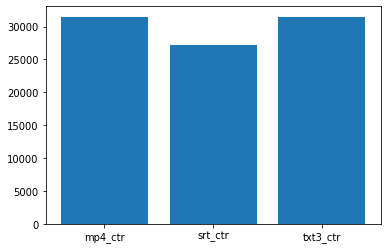

In [12]:
# Bar plot for visualizing the count of various file types
# X-axis: File Type
# Y-axis: Count
plt.bar(["mp4_ctr","srt_ctr","txt3_ctr"], [mp4_ctr,srt_ctr,txt3_ctr])

## Basic Metadata

In [13]:
# Constant label values which are extracted from the file name
COLUMN_LABELS = ['Pull Date','Year','Month','Day','TODO','Lang','Barcode','V No.','File Type','File Path']

In [14]:
# Create pandas DataFrame for all mp4 files
mp4_df = pd.DataFrame(mp4_files_split, columns=COLUMN_LABELS)
mp4_df

Pull Date  Year Month Day  TODO Lang   Barcode V No. File Type  \
0      1972-07-01  1972    07  01  0000   US  00010144    V0    DB.mp4   
1      1972-10-06  1972    10  06  0000   US  00016471    V0    JS.mp4   
2      1972-10-06  1972    10  06  0000   US  00015980    V1    JS.mp4   
3      1972-09-14  1972    09  14  0000   US  00025933    B0    KC.mp4   
4      1972-09-01  1972    09  01  0000   US  00016359    V0    WR.mp4   
...           ...   ...   ...  ..   ...  ...       ...   ...       ...   
31444  1987-06-09  1987    06  09  0000   US  00021650    B0    KQ.mp4   
31445  1987-06-22  1987    06  22  0000   US  00043099    B0    KH.mp4   
31446  1987-06-10  1987    06  10  0000   US  NA012366    B0    MM.mp4   
31447  1969-03-21  1969    03  21  0000   US  00010209    V0    DB.mp4   
31448  1963-04-08  1963    04  08  0000   US  00014502    V1    CS.mp4   

                                               File Path  
0      /mnt/rds/redhen/gallina/Rosenthal/1972/1972-07...  
1      /mnt/rds/redhen/gallina/Rosenthal/1972/1972-10...  
2      /mnt/rds/redhen/gallina/Rosenthal/1972/1972-10...  
3      /mnt/rds/redhen/gallina/Rosenthal/1972/1972-09...  
4      /mnt/rds/redhen/gallina/Rosenthal/1972/1972-09...  
...                                                  ...  
31444  /mnt/rds/redhen/gallina/Rosenthal/1987/1987-06...  
31445  /mnt/rds/redhen/gallina/Rosenthal/1987/1987-06...  
31446  /mnt/rds/redhen/gallina/Rosenthal/1987/1987-06...  
31447  /mnt/rds/redhen/gallina/Rosenthal/1969/1969-03...  
31448  /mnt/rds/redhen/gallina/Rosenthal/1963/1963-04...  

[31449 rows x 10 columns]

In [15]:
# Create pandas DataFrame for all srt files
srt_df = pd.DataFrame(srt_files_split, columns=COLUMN_LABELS)
srt_df

Pull Date  Year Month Day  TODO Lang   Barcode V No. File Type  \
0      1972-10-06  1972    10  06  0000   US  00015980    V1    JS.srt   
1      1972-10-06  1972    10  06  0000   US  00016471    V0    JS.srt   
2      1972-09-14  1972    09  14  0000   US  00025933    B0    KC.srt   
3      1972-09-01  1972    09  01  0000   US  00016359    V0    WR.srt   
4      1972-06-20  1972    06  20  0000   US  00019724    B3    WR.srt   
...           ...   ...   ...  ..   ...  ...       ...   ...       ...   
27150  1987-06-04  1987    06  04  0000   US  00022777    B0    HM.srt   
27151  1987-06-04  1987    06  04  0000   US  NA012623    B0    MM.srt   
27152  1987-06-09  1987    06  09  0000   US  00021650    B0    KQ.srt   
27153  1987-06-10  1987    06  10  0000   US  NA012366    B0    MM.srt   
27154  1963-04-08  1963    04  08  0000   US  00014502    V1    CS.srt   

                                               File Path  
0      /mnt/rds/redhen/gallina/Rosenthal/1972/1972-10...  
1      /mnt/rds/redhen/gallina/Rosenthal/1972/1972-10...  
2      /mnt/rds/redhen/gallina/Rosenthal/1972/1972-09...  
3      /mnt/rds/redhen/gallina/Rosenthal/1972/1972-09...  
4      /mnt/rds/redhen/gallina/Rosenthal/1972/1972-06...  
...                                                  ...  
27150  /mnt/rds/redhen/gallina/Rosenthal/1987/1987-06...  
27151  /mnt/rds/redhen/gallina/Rosenthal/1987/1987-06...  
27152  /mnt/rds/redhen/gallina/Rosenthal/1987/1987-06...  
27153  /mnt/rds/redhen/gallina/Rosenthal/1987/1987-06...  
27154  /mnt/rds/redhen/gallina/Rosenthal/1963/1963-04...  

[27155 rows x 10 columns]

In [16]:
# Create pandas DataFrame for all txt3 files
txt3_df = pd.DataFrame(txt3_files_split, columns=COLUMN_LABELS)
txt3_df

Pull Date  Year Month Day  TODO Lang   Barcode V No. File Type  \
0      1972-07-01  1972    07  01  0000   US  00010144    V0   DB.txt3   
1      1972-10-06  1972    10  06  0000   US  00015980    V1   JS.txt3   
2      1972-10-06  1972    10  06  0000   US  00016471    V0   JS.txt3   
3      1972-09-14  1972    09  14  0000   US  00025933    B0   KC.txt3   
4      1972-09-01  1972    09  01  0000   US  00016359    V0   WR.txt3   
...           ...   ...   ...  ..   ...  ...       ...   ...       ...   
31474  1987-06-09  1987    06  09  0000   US  00021650    B0   KQ.txt3   
31475  1987-06-22  1987    06  22  0000   US  00043099    B0   KH.txt3   
31476  1987-06-10  1987    06  10  0000   US  NA012366    B0   MM.txt3   
31477  1969-03-21  1969    03  21  0000   US  00010209    V0   DB.txt3   
31478  1963-04-08  1963    04  08  0000   US  00014502    V1   CS.txt3   

                                               File Path  
0      /mnt/rds/redhen/gallina/Rosenthal/1972/1972-07...  
1      /mnt/rds/redhen/gallina/Rosenthal/1972/1972-10...  
2      /mnt/rds/redhen/gallina/Rosenthal/1972/1972-10...  
3      /mnt/rds/redhen/gallina/Rosenthal/1972/1972-09...  
4      /mnt/rds/redhen/gallina/Rosenthal/1972/1972-09...  
...                                                  ...  
31474  /mnt/rds/redhen/gallina/Rosenthal/1987/1987-06...  
31475  /mnt/rds/redhen/gallina/Rosenthal/1987/1987-06...  
31476  /mnt/rds/redhen/gallina/Rosenthal/1987/1987-06...  
31477  /mnt/rds/redhen/gallina/Rosenthal/1969/1969-03...  
31478  /mnt/rds/redhen/gallina/Rosenthal/1963/1963-04...  

[31479 rows x 10 columns]

### V No. Bar Plot

In [17]:
# Basic filter
# Remove V No. with frequency less than 10
THRESHOLD = 100
value_counts = mp4_df['V No.'].value_counts()
to_remove = value_counts[value_counts <= THRESHOLD].index
mp4_filtered_df = mp4_df.replace(to_remove, np.nan, inplace=False)
mp4_filtered_df.dropna()
mp4_filtered_df

Pull Date  Year Month Day  TODO Lang   Barcode V No. File Type  \
0      1972-07-01  1972    07  01  0000   US  00010144    V0    DB.mp4   
1      1972-10-06  1972    10  06  0000   US  00016471    V0    JS.mp4   
2      1972-10-06  1972    10  06  0000   US  00015980    V1    JS.mp4   
3      1972-09-14  1972    09  14  0000   US  00025933    B0    KC.mp4   
4      1972-09-01  1972    09  01  0000   US  00016359    V0    WR.mp4   
...           ...   ...   ...  ..   ...  ...       ...   ...       ...   
31444  1987-06-09  1987    06  09  0000   US  00021650    B0    KQ.mp4   
31445  1987-06-22  1987    06  22  0000   US  00043099    B0    KH.mp4   
31446  1987-06-10  1987    06  10  0000   US  NA012366    B0    MM.mp4   
31447  1969-03-21  1969    03  21  0000   US  00010209    V0    DB.mp4   
31448  1963-04-08  1963    04  08  0000   US  00014502    V1    CS.mp4   

                                               File Path  
0      /mnt/rds/redhen/gallina/Rosenthal/1972/1972-07...  
1      /mnt/rds/redhen/gallina/Rosenthal/1972/1972-10...  
2      /mnt/rds/redhen/gallina/Rosenthal/1972/1972-10...  
3      /mnt/rds/redhen/gallina/Rosenthal/1972/1972-09...  
4      /mnt/rds/redhen/gallina/Rosenthal/1972/1972-09...  
...                                                  ...  
31444  /mnt/rds/redhen/gallina/Rosenthal/1987/1987-06...  
31445  /mnt/rds/redhen/gallina/Rosenthal/1987/1987-06...  
31446  /mnt/rds/redhen/gallina/Rosenthal/1987/1987-06...  
31447  /mnt/rds/redhen/gallina/Rosenthal/1969/1969-03...  
31448  /mnt/rds/redhen/gallina/Rosenthal/1963/1963-04...  

[31449 rows x 10 columns]

In [18]:
# Method to plot bar chart based on V No.
def v_bar_plot(df,title):
    ax = df['V No.'].value_counts().plot(kind='bar', figsize=(15,8), title=title)

    ax.set_xlabel("V No.")
    ax.set_ylabel("Freequency")

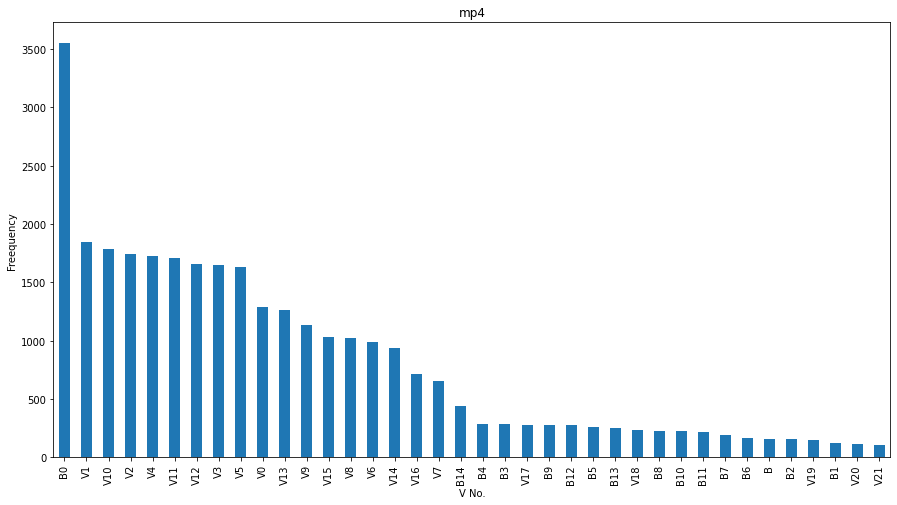

In [19]:
# Plots a bar chart for V No.
# X-Axis = V No.
# Y-Axis = Frequency
v_bar_plot(mp4_filtered_df,'mp4')

### Phase 1 V No. Count

In [20]:
mp4_series = mp4_df['V No.'].value_counts()
mp4_series

B0      3553
V1      1842
V10     1788
V2      1746
V4      1724
        ... 
B651       1
B718       1
B738       1
B707       1
B871       1
Name: V No., Length: 501, dtype: int64

In [21]:
def confusion_matrix(df: pd.DataFrame, col1: str, col2: str):
    """
    Given a dataframe with at least
    two categorical columns, create a 
    confusion matrix of the count of the columns
    cross-counts
    
    use like:
    
    >>> confusion_matrix(test_df, 'actual_label', 'predicted_label')
    """
    return (
            df
            .groupby([col1, col2])
            .size()
            .unstack(fill_value=0)
            )

In [22]:
confusion_matrix(mp4_filtered_df,'V No.', 'Year')

Year   1960  1961  1962  1963  1969  1971  1972  1973  1974  1975  ...  1986  \
V No.                                                              ...         
B         0     0     0     0     0     0     4     0     0     0  ...     0   
B0        2     0     0     0     0     1   357     0     1     1  ...   179   
B1        0     0     0     0     0     0     2     0     0     0  ...     0   
B10       0     0     0     0     0     0     0     0     0     0  ...     0   
B11       0     0     0     0     0     0     0     0     0     0  ...     0   
B12       0     0     0     0     0     0     0     0     0     0  ...     0   
B13       0     0     0     0     0     0     0     0     0     0  ...     0   
B14       0     0     0     0     0     0     0     0     0     0  ...     0   
B2        0     0     0     0     0     0     0     0     0     0  ...     0   
B3        0     0     0     0     0     0     1     0     0     0  ...     0   
B4        0     0     0     0     0     0     0     0     0     0  ...     0   
B5        0     0     0     0     0     0     0     0     0     0  ...     0   
B6        0     0     0     0     0     0     0     0     0     0  ...     1   
B7        0     0     0     0     0     0     0     0     0     0  ...     0   
B8        0     0     0     0     0     0     0     0     0     0  ...     1   
B9        0     0     0     0     0     0     0     0     0     0  ...     0   
V0        1     2     0     0     1     3   227    15    15     6  ...     5   
V1        0     0     1     1     0     1     5     0     0     0  ...     0   
V10       0     0     1     0     0     0    12     0     0     0  ...     0   
V11       0     0     0     0     0     0     3     0     0     0  ...     0   
V12       0     0     0     0     0     0     4     0     0     0  ...     0   
V13       0     0     0     0     0     0     2     0     0     0  ...     0   
V14       0     0     0     0     0     0     2     0     0     0  ...     0   
V15       0     0     0     0     0     0     0     0     0     0  ...     0   
V16       0     0     0     0     0     0     0     0     0     0  ...     0   
V17       0     0     0     0     0     0     0     0     0     0  ...     0   
V18       0     0     0     0     0     0     0     0     0     0  ...     0   
V19       0     0     0     0     0     0     0     0     0     0  ...     0   
V2        0     0     2     0     0     0     5     0     0     0  ...     0   
V20       0     0     0     0     0     0     0     0     0     0  ...     0   
V21       0     0     0     0     0     0     0     0     0     0  ...     0   
V3        0     0     0     0     0     0     2     0     0     0  ...     0   
V4        0     0     0     0     0     1     4     0     0     0  ...     0   
V5        0     0     1     0     0     0     5     0     0     0  ...     0   
V6        0     0     0     0     0     1     2     0     0     0  ...     0   
V7        0     0     0     0     0     0     4     0     0     0  ...     0   
V8        0     0     0     0     0     0     6     0     0     0  ...     0   
V9        0     0     0     0     0     0     3     0     0     0  ...     0   

Year   1987  1988  1989  1990  1991  1992  2004  2005  2006  
V No.                                                        
B         0     0     4     4   144     0     0     0     0  
B0      225   399    41    44   248   420     0     3     5  
B1        2    70     0     0     0     0     0     0     0  
B10       7   153    64     0     0     0     0     0     0  
B11       3   145    63     0     0     0     0     1     0  
B12       0   153   121     0     0     0     0     0     0  
B13       1   134   114     0     0     0     0     0     0  
B14       0   268   169     0     0     0     0     0     0  
B2        3    96     0     0     0     0     0     0     0  
B3        2   126    92     0     0     0     0     0     0  
B4        7   145    97     0     0     0     0     0  

### Preprocessing 

#### Filter Category 1

In [23]:
cat1_df = mp4_filtered_df.loc[(mp4_filtered_df['V No.']=='V1')|(mp4_filtered_df['V No.']=='V2')|(mp4_filtered_df['V No.']=='V3')]
cat1_df = cat1_df.loc[cat1_df['Year'].astype(int)>=1995]
cat1_df

Pull Date  Year Month Day  TODO Lang   Barcode V No. File Type  \
3598   2006-12-11  2006    12  11  0000   US  00018530    V1    NV.mp4   
3599   2006-12-11  2006    12  11  0000   US  00018529    V2    JB.mp4   
3600   2006-12-11  2006    12  11  0000   US  00018522    V3    NV.mp4   
3602   2006-12-30  2006    12  30  0000   US  00018510    V3    GM.mp4   
3604   2006-12-08  2006    12  08  0000   US   Archive    V2    GG.mp4   
...           ...   ...   ...  ..   ...  ...       ...   ...       ...   
30535  2004-12-29  2004    12  29  0000   US  00005337    V3    ST.mp4   
30537  2004-12-29  2004    12  29  0000   US  00005329    V2    JK.mp4   
30542  2004-12-23  2004    12  23  0000   US  00005579    V3    LZ.mp4   
30543  2004-12-23  2004    12  23  0000   US  00005578    V2    MM.mp4   
30547  2004-12-23  2004    12  23  0000   US  00005577    V1    MM.mp4   

                                               File Path  
3598   /mnt/rds/redhen/gallina/Rosenthal/2006/2006-12...  
3599   /mnt/rds/redhen/gallina/Rosenthal/2006/2006-12...  
3600   /mnt/rds/redhen/gallina/Rosenthal/2006/2006-12...  
3602   /mnt/rds/redhen/gallina/Rosenthal/2006/2006-12...  
3604   /mnt/rds/redhen/gallina/Rosenthal/2006/2006-12...  
...                                                  ...  
30535  /mnt/rds/redhen/gallina/Rosenthal/2004/2004-12...  
30537  /mnt/rds/redhen/gallina/Rosenthal/2004/2004-12...  
30542  /mnt/rds/redhen/gallina/Rosenthal/2004/2004-12...  
30543  /mnt/rds/redhen/gallina/Rosenthal/2004/2004-12...  
30547  /mnt/rds/redhen/gallina/Rosenthal/2004/2004-12...  

[2605 rows x 10 columns]

#### Store files 

In [24]:
store_batch_path = '/mnt/rds/redhen/gallina/home/hxm471/RedHenLab-Multimodal_TV_Show_Segmentation/mtvss/data/tmp/batch_cat1.npy'
store_raw_path='/mnt/rds/redhen/gallina/home/hxm471/RedHenLab-Multimodal_TV_Show_Segmentation/mtvss/data/tmp/raw_cat1.csv'

In [25]:
cat1_df.to_csv(store_raw_path)

#### Create Batches 

In [26]:
BATCH_SIZE = 100
batches = []
for g, df_sub in cat1_df.groupby(np.arange(len(cat1_df)) // BATCH_SIZE):
    batches.append(df_sub['File Path'].values[:])
batches = np.array(batches)
np.save(store_batch_path,batches)

/tmp/ipykernel_13851/3476360199.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  batches = np.array(batches)


In [27]:
batches_load = np.load(store_batch_path,allow_pickle=True)
batches_load[1]

array(['/mnt/rds/redhen/gallina/Rosenthal/2006/2006-01/2006-01-19/2006-01-19_0000_US_00002692_V2_MB13_VHS14_H13_CG.mp4',
       '/mnt/rds/redhen/gallina/Rosenthal/2006/2006-01/2006-01-19/2006-01-19_0000_US_00000128_V1_M3_VHS11_H13_JK.mp4',
       '/mnt/rds/redhen/gallina/Rosenthal/2006/2006-01/2006-01-26/2006-01-26_0000_US_00003714_V2_MB12_VHS13_H2_CG.mp4',
       '/mnt/rds/redhen/gallina/Rosenthal/2006/2006-01/2006-01-26/2006-01-26_0000_US_00002679_V1_MB13_VHS14_H13_MS.mp4',
       '/mnt/rds/redhen/gallina/Rosenthal/2006/2006-01/2006-01-26/2006-01-26_0000_US_00000190_V3_M2_VHS10_H4_MS.mp4',
       '/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-09/2006-06-09_0000_US_00004046_V3_VHS35_MB41_H26_AS_BE.mp4',
       '/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-09/2006-06-09_0000_US_00004046_V3_VHS51_MB22_H37_PL.mp4',
       '/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-09/2006-06-09_0000_US_00002753_V1_MB8_VHS4_E1_JK.mp4',
       '/mnt/rds/redhen/gallina/Rosent